# 2D Regression with a DNN Splitting the Database

We'll implement a script to regress 2D data using a two-layer dense neural network trained splitting the database between training set, validation set, and test set.

## Load Data

We load the data using the function `load_data()` contained in `loader.py`.

In [ ]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_nonlinear.csv")

print("x:", x)
print("y_gt:", y_gt)

## Splitting Datasets



In [ ]:
from numpy import split, delete
from numpy.random import choice

num_samples = len(x)
split = .70

num_samples_train = int(split * num_samples)
train_idx = choice(num_samples, num_samples_train, replace=False)

x_train = x[train_idx] # train inputs
y_gt_train = y_gt[train_idx] # train groundtruths

x_val = delete(x, train_idx, axis=0) # validation inputs
y_gt_val = delete(y_gt, train_idx, axis=0) # validation groundtruths

## Two-Layer Neural Network

We now create a two-layer neural network and randomly initialize it.

In [ ]:
from numpy.random import default_rng

rng = default_rng()

def sigmoid(x):
    from numpy import exp
    return 1 / (1 + exp(-x))

num_neurons = 10

wa = rng.standard_normal(size=(2, num_neurons)) # input weights layer 1
wb = rng.standard_normal(size=(num_neurons, 1)) # input weights layer 2 (output)

y_p_train = sigmoid(x_train @ wa) @ wb
y_p_val = sigmoid(x_val @ wa) @ wb

We now plot the data and predictions using the functions `plot_pred_2d` and `plot_pred_vs_gt()` from `plotting.py`.

For the training set:

In [ ]:
from plotting import plot_pred_2d, plot_pred_vs_gt

plot_pred_2d(x_train, y_gt_train, y_p_train)
plot_pred_vs_gt(y_gt_train, y_p_train)

... and for the validation set.

In [ ]:
plot_pred_2d(x_val, y_gt_val, y_p_val)
plot_pred_vs_gt(y_gt_val, y_p_val)

## Training

We now train the neural network...

In [ ]:
from numpy import reshape, transpose, sum, zeros, mean
from numpy.random import permutation

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))
	
num_samples = len(x_train)
num_batches = 7
batch_size = int(num_samples / num_batches)
num_epochs = 10**4
eta = .1 # learning rate

mse_train = zeros((num_epochs,))
mse_val = zeros((num_epochs,))

for epoch in range(num_epochs):
	permuted_order_samples = permutation(num_samples)
	x_permuted = x_train[permuted_order_samples]
	y_gt_permuted = y_gt_train[permuted_order_samples]
	
	for batch_start in range(0, num_samples, batch_size):

		dwa = zeros(wa.shape) # initialize weight increments layer 1
		dwb = zeros(wb.shape) # initialize weight increments layer 2

		for selected in range(batch_start, batch_start + batch_size):
			x_selected = reshape(x_permuted[selected], (1, -1))
			y_gt_selected = reshape(y_gt_permuted[selected], (1, -1))

			x_selected_a = x_selected # input layer 1
			p_a = x_selected_a @ wa # activation potential layer 1
			y_selected_a = sigmoid(p_a) # output layer 1
			
			x_selected_b = y_selected_a # input layer 2 (output neuron)
			p_b = x_selected_b @ wb # activation potential layer 2
			y_selected_b = p_b # output neuron layer 2

			y_p_selected = y_selected_b
			
			error = y_p_selected - y_gt_selected

			delta_b = error * 1
			wb -= eta * delta_b * transpose(x_selected_b) # update weights layer 2

			delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
			wa -= eta * delta_a * transpose(x_selected_a) # update weights layer 1

		wa += dwa / batch_size # update weights layer 1
		wb += dwb / batch_size # update weights layer 2

	y_p_train = sigmoid(x_train @ wa) @ wb
	mse_train[epoch] = mean((y_p_train - y_gt_train)**2)

	y_p_val = sigmoid(x_val @ wa) @ wb
	mse_val[epoch] = mean((y_p_val - y_gt_val)**2)

	print(f"ep={epoch} MSEtrain={mse_train[epoch]:.4f} MSEval={mse_val[epoch]:.4f}")

We can now plot the _mean squared error_ as a function of the training epoch using function `plot_mse()` now added to `plotting` for the training set ...

In [ ]:
# from plotting import plot_mse

plot_mse(mse_train)

... and for the validation set.

In [ ]:
plot_mse(mse_val, color="tab:green")

## Testing

We now check how the trained neuron works on the test data.

In [ ]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_nonlinear_test.csv")

y_p_trained_test = sigmoid(x_test @ wa) @ wb

plot_pred_2d(x_test, y_gt_test, y_p_trained_test)
plot_pred_vs_gt(y_gt_test, y_p_trained_test)

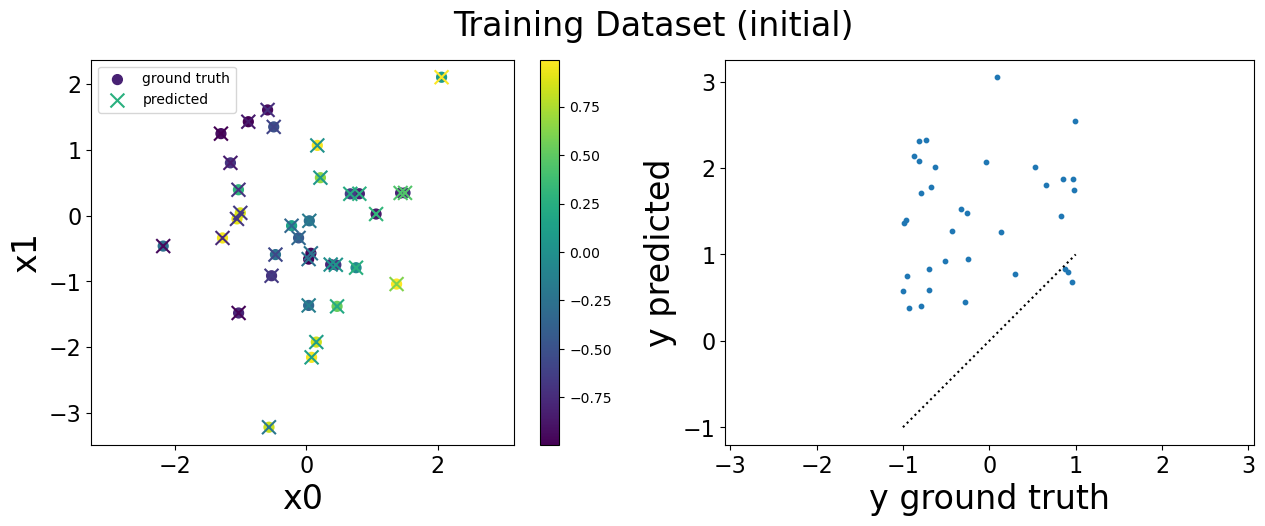

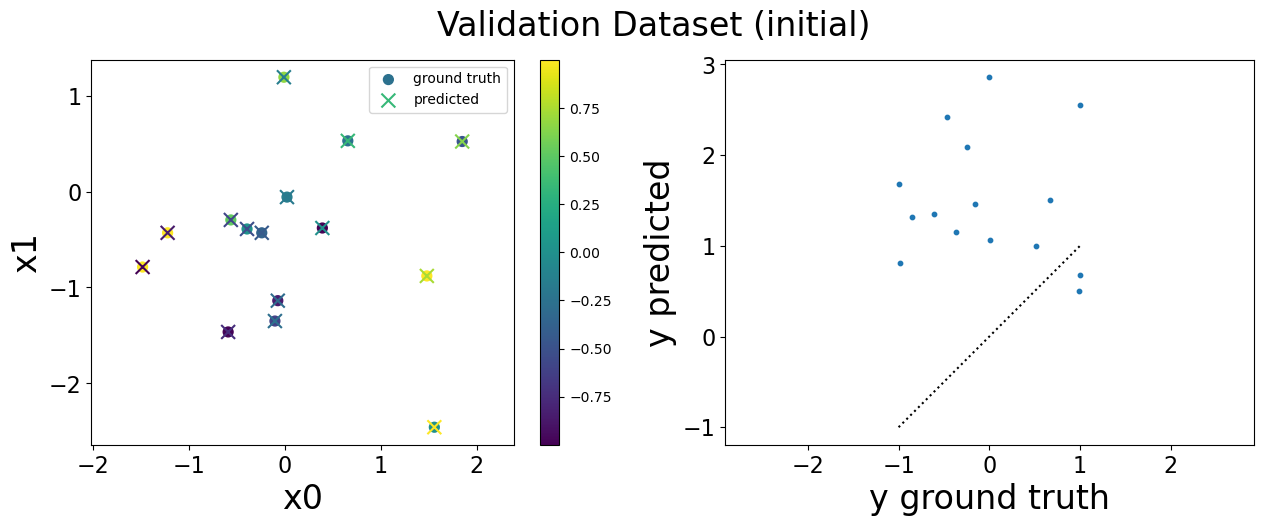

epoch 0	 MSE train = 0.4214	 MSE validation = 0.4689
epoch 1	 MSE train = 0.3402	 MSE validation = 0.3937
epoch 2	 MSE train = 0.3083	 MSE validation = 0.3644
epoch 3	 MSE train = 0.2843	 MSE validation = 0.3439
epoch 4	 MSE train = 0.2695	 MSE validation = 0.3339
epoch 5	 MSE train = 0.2689	 MSE validation = 0.3420
epoch 6	 MSE train = 0.2636	 MSE validation = 0.3443
epoch 7	 MSE train = 0.2488	 MSE validation = 0.3331
epoch 8	 MSE train = 0.2453	 MSE validation = 0.3328
epoch 9	 MSE train = 0.2396	 MSE validation = 0.3326
epoch 10	 MSE train = 0.2346	 MSE validation = 0.3317
epoch 11	 MSE train = 0.2317	 MSE validation = 0.3339
epoch 12	 MSE train = 0.2303	 MSE validation = 0.3403
epoch 13	 MSE train = 0.2372	 MSE validation = 0.3497
epoch 14	 MSE train = 0.2228	 MSE validation = 0.3369
epoch 15	 MSE train = 0.2159	 MSE validation = 0.3313
epoch 16	 MSE train = 0.2128	 MSE validation = 0.3318
epoch 17	 MSE train = 0.2125	 MSE validation = 0.3278
epoch 18	 MSE train = 0.2062	 MSE vali

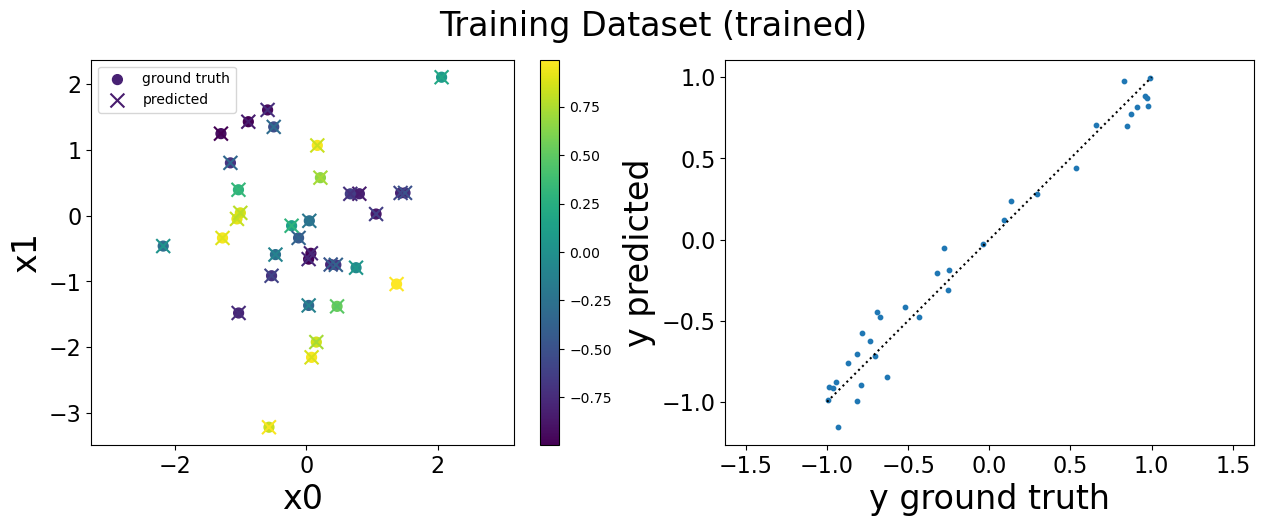

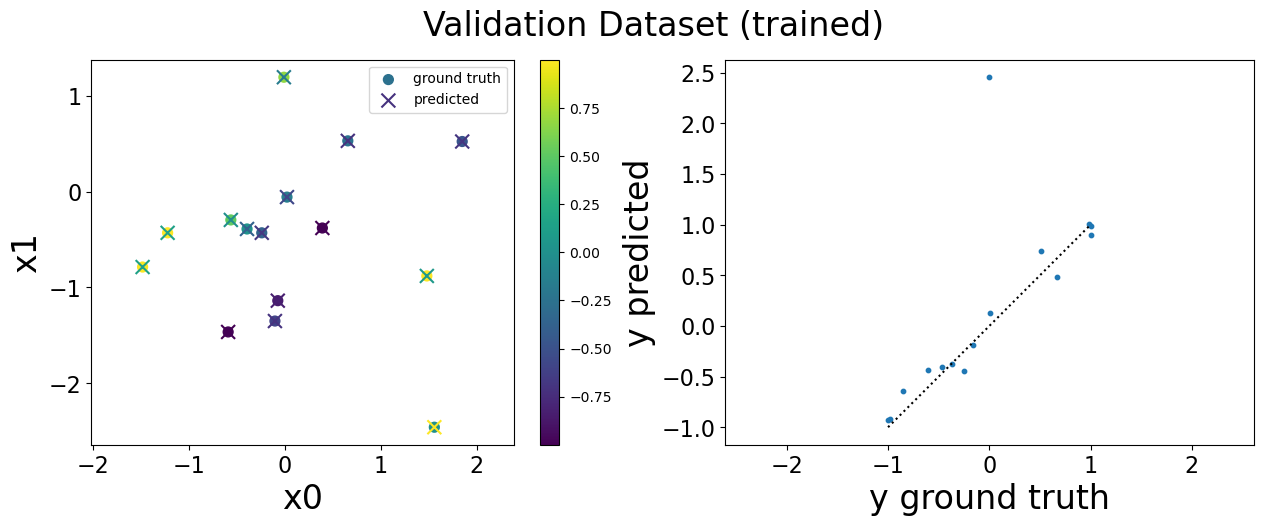

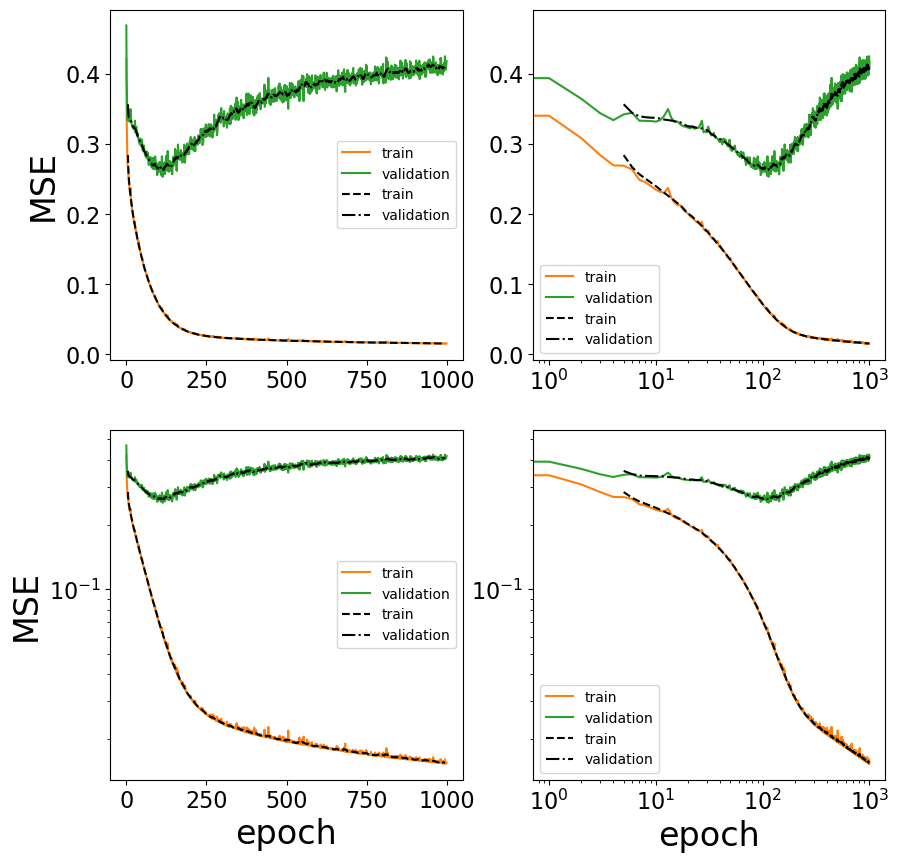

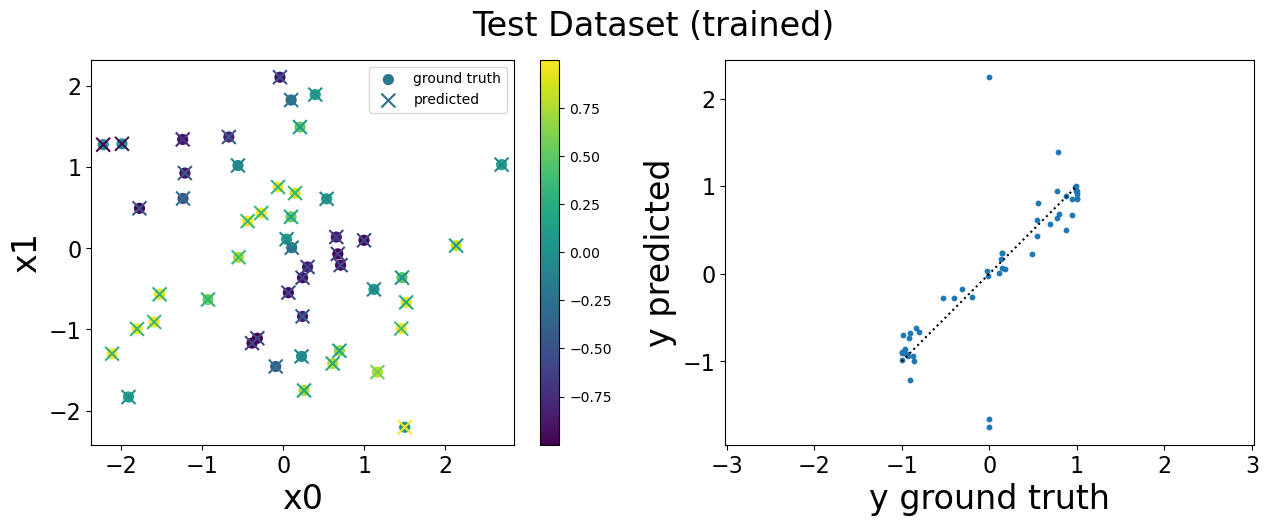

In [3]:
from numpy import reshape, transpose, sum, zeros, mean, convolve, full, split , delete
from numpy.random import default_rng, permutation, choice
import matplotlib.pyplot as plt

from loader import load_data


def dnn(wa, wb, x):
	return sigmoid(x @ wa) @ wb


def plot_prediction(x, y_groundtruth, y_predicted, title=""):
	fig, (ax0, ax1) = plt.subplots(1, 2)
	fig.suptitle(title, fontsize=24)
	fig.set_size_inches(15, 5)
	
	p = ax0.scatter(x[:, 0], x[:, 1], c=y_groundtruth, s=50, label="ground truth")
	plt.colorbar(p, ax=ax0)
	ax0.scatter(x[:, 0], x[:, 1], c=y_predicted, s=100, marker="x", label="predicted") 
	ax0.legend()
	ax0.axis("equal")
	ax0.set_xlabel("x0", fontsize=24) 
	ax0.set_ylabel("x1", fontsize=24)
	ax0.tick_params(axis="both", which="major", labelsize=16)

	ax1.plot([-1, 1], [-1, 1], 'k:')
	ax1.scatter(y_groundtruth, y_predicted, s=10)
	ax1.axis("equal")
	ax1.set_xlabel("y ground truth", fontsize=24) 
	ax1.set_ylabel("y predicted", fontsize=24)
	ax1.tick_params(axis="both", which="major", labelsize=16)

	plt.show()


def plot_mse(mse_mean_train, mse_mean_validation):
	smoothing_length = 11
	mse_mean_train_smoothed = convolve(mse_mean_train, full((smoothing_length,), 1 / smoothing_length), mode="valid")
	mse_mean_validation_smoothed = convolve(mse_mean_validation, full((smoothing_length,), 1 / smoothing_length), mode="valid")

	fig, ax = plt.subplots(2, 2)
	fig.set_size_inches(10, 10)

	ax[0, 0].plot(mse_mean_train, c="tab:orange", label="train")
	ax[0, 0].plot(mse_mean_validation, c="tab:green", label="validation")
	ax[0, 0].plot(range(smoothing_length // 2, len(mse_mean_train) - smoothing_length // 2), mse_mean_train_smoothed, "k--", label="train")
	ax[0, 0].plot(range(smoothing_length // 2, len(mse_mean_validation) - smoothing_length // 2), mse_mean_validation_smoothed, "k-.", label="validation")
	ax[0, 0].legend()
	ax[0, 0].set_ylabel("MSE", fontsize=24)
	ax[0, 0].tick_params(axis="both", which="major", labelsize=16)

	ax[1, 0].semilogy(mse_mean_train, c="tab:orange", label="train")
	ax[1, 0].semilogy(mse_mean_validation, c="tab:green", label="validation")
	ax[1, 0].semilogy(range(smoothing_length // 2, len(mse_mean_train) - smoothing_length // 2), mse_mean_train_smoothed, "k--", label="train")
	ax[1, 0].semilogy(range(smoothing_length // 2, len(mse_mean_validation) - smoothing_length // 2), mse_mean_validation_smoothed, "k-.", label="validation")
	ax[1, 0].legend() ###
	ax[1, 0].set_xlabel("epoch", fontsize=24) 
	ax[1, 0].set_ylabel("MSE", fontsize=24)
	ax[1, 0].tick_params(axis="both", which="major", labelsize=16)

	ax[0, 1].semilogx(mse_mean_train, c="tab:orange", label="train")
	ax[0, 1].semilogx(mse_mean_validation, c="tab:green", label="validation")
	ax[0, 1].semilogx(range(smoothing_length // 2, len(mse_mean_train) - smoothing_length // 2), mse_mean_train_smoothed, "k--", label="train")
	ax[0, 1].semilogx(range(smoothing_length // 2, len(mse_mean_validation) - smoothing_length // 2), mse_mean_validation_smoothed, "k-.", label="validation")
	ax[0, 1].legend()
	ax[0, 1].tick_params(axis="both", which="major", labelsize=16)

	ax[1, 1].loglog(mse_mean_train, c="tab:orange", label="train") ###
	ax[1, 1].loglog(mse_mean_validation, c="tab:green", label="validation") ###
	ax[1, 1].loglog(range(smoothing_length // 2, len(mse_mean_train) - smoothing_length // 2), mse_mean_train_smoothed, "k--", label="train")
	ax[1, 1].loglog(range(smoothing_length // 2, len(mse_mean_validation) - smoothing_length // 2), mse_mean_validation_smoothed, "k-.", label="validation")
	ax[1, 1].legend()
	ax[1, 1].set_xlabel("epoch", fontsize=24) 
	ax[1, 1].tick_params(axis="both", which="major", labelsize=16)

	plt.show()


# load data
(x, y_groundtruth) = load_data(filename="data_reg_2d_nonlinear.csv")

# split data
train_validation_split = .70
number_samples = len(x)

number_samples_train = int(train_validation_split * number_samples)
training_indices = choice(number_samples , number_samples_train , replace=False)

x_train = x[training_indices]
y_groundtruth_train = y_groundtruth[training_indices]

x_validation = delete(x, training_indices , axis=0) 
y_groundtruth_validation = delete(y_groundtruth , training_indices , axis=0)

# define neural network
number_neurons = 10

def sigmoid(x):
	from numpy import exp
	return 1 / (1 + exp(-x))

def derivative_sigmoid(x):
	return sigmoid(x) * (1 - sigmoid(x))

rng = default_rng()
wa = rng.standard_normal(size=(2, number_neurons)) # input weights for 1st layer (layer a)
wb = rng.standard_normal(size=(number_neurons, 1)) # input weights for output neuron (layer b)

# calculate and plot prediction
plot_prediction(x_train, y_groundtruth_train, y_predicted=dnn(wa, wb, x_train), title="Training Dataset (initial)")
plot_prediction(x_validation, y_groundtruth_validation, y_predicted=dnn(wa, wb, x_validation), title="Validation Dataset (initial)")

# train neural network
number_samples = len(x_train)
number_batches = 7
batch_size = int(number_samples / number_batches)
number_epochs = 10**3
eta = .1 # learning rate

mse_mean_train = zeros((number_epochs,))
mse_mean_validation = zeros((number_epochs,))

for epoch in range(number_epochs):

	# Permute samples and ground truth
	permuted_order_samples = permutation(number_samples)
	x_permuted = x_train[permuted_order_samples]
	y_groundtruth_permuted = y_groundtruth_train[permuted_order_samples]

	for batch_start_sample in range(0, number_samples, batch_size):

		dwa = zeros(wa.shape);
		dwb = zeros(wb.shape);

		for selected in range(batch_start_sample, batch_start_sample + batch_size):
			x_selected = reshape(x_permuted[selected], (1, -1))
			y_groundtruth_selected = reshape(y_groundtruth_permuted[selected], (1, -1))

			# detailed neural network calculation
			x_selected_a = x_selected
			p_a = x_selected_a @ wa
			y_selected_a = sigmoid(p_a)

			x_selected_b = y_selected_a
			p_b = x_selected_b @ wb
			y_selected_b = p_b

			y_predicted_selected = y_selected_b

			# error
			error = y_predicted_selected - y_groundtruth_selected

			# update weights
			delta_b = error * 1 # note linear output
			dwb -= eta * delta_b * transpose(x_selected_b)

			delta_a = sum(wb * delta_b, axis=1) * derivative_sigmoid(p_a) 
			dwa -= eta * delta_a * transpose(x_selected_a)

		wa += dwa / batch_size
		wb += dwb / batch_size

	y_predicted_train = sigmoid(x_train @ wa) @ wb
	mse_mean_train[epoch] = mean((y_predicted_train - y_groundtruth_train)**2)

	y_predicted_validation = sigmoid(x_validation @ wa) @ wb
	mse_mean_validation[epoch] = mean((y_predicted_validation - y_groundtruth_validation)**2)

	print(f"epoch {epoch}\t MSE train = {mse_mean_train[epoch]:.4f}\t MSE validation = {mse_mean_validation[epoch]:.4f}") ###

# calculate and plot prediction on training data
plot_prediction(x_train, y_groundtruth_train, y_predicted=dnn(wa, wb, x_train), title="Training Dataset (trained)")
plot_prediction(x_validation, y_groundtruth_validation, y_predicted=dnn(wa, wb, x_validation), title="Validation Dataset (trained)")

# plot training MSE as a function of epoch
plot_mse(mse_mean_train, mse_mean_validation)

# calculate and plot prediction on test data
(x_test, y_groundtruth_test) = load_data(filename="data_reg_2d_nonlinear_test.csv")
plot_prediction(x_test, y_groundtruth_test, y_predicted=dnn(wa, wb, x_test), title="Test Dataset (trained)")